<a href="https://colab.research.google.com/github/rubyywangg/Machine-Learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
# in a specified number of wines, we are looking at the differnt ingredients in each wine and seeing predicting how much alcholol there is and then comparing it to how much alcohol there actually is

In [4]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTDsF-Aey_9_nQWZPFiAZgavpg8p2WEH0oLtofQI9E7XoCQrpe7uSlyqcFnGibYTrpy6RnIa2Vq1Dba/pub?output=csv'

In [5]:
df = pd.read_csv(url) #use pandas to convert url to data frame

In [6]:
print(df.head()) #prints out the first 5 rows of each column

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [8]:
#need our traning and testing data set
num_rows, num_cols = df.shape
print(num_rows, num_cols) #6497 rows and 13 columns

6497 13


In [9]:
#get rid of the first row
df = df.iloc[:,1:num_cols] #want all the rows but only start from 1st index for columns

In [10]:
num_rows, num_cols = df.shape
print(num_rows,num_cols) #print updated sit after getting rid of one column from before

6497 12


In [11]:
data = df.values #assign

In [12]:
#build our x variable and y variables
#if we are specifically getting the acholol list:
y_idx = 10 #alcohol index
x_idxs = []
#add every index that isnt our output
for i in range (num_cols):
  if i != y_idx:
    x_idxs.append(i)

In [15]:
print(x_idxs) #notice 10 is NOT included in the list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]


In [16]:
#X is a matrix and y is a vector
X, y = data[:,x_idxs], data [:,y_idx]

In [17]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1) #test_size splits the testing data to 25% and training data to 75%

In [43]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #shows you the matrix for the training and testing data

(4872, 11) (1625, 11) (4872,) (1625,)


In [44]:
#now let's get the computer to learn something!
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()
#modeling the linear regression model
model.fit(X_train, y_train)

LinearRegression()

In [46]:
#output of machine learning model (prediction)
y_hat = model.predict(X_test) #yhat represents a prediction of how much acholol there is

In [47]:
from sklearn.metrics import mean_absolute_error #calcualutes the mean absolute error (since you will never have 0 error)

In [48]:
avg_error = mean_absolute_error(y_test, y_hat) #ytest is how much alcohol there is ACTUALLY

In [49]:
print(avg_error) #this is the percentage of alcohol

0.391336795413691


In [52]:
import matplotlib.pyplot as plt

(6.0, 15.0)

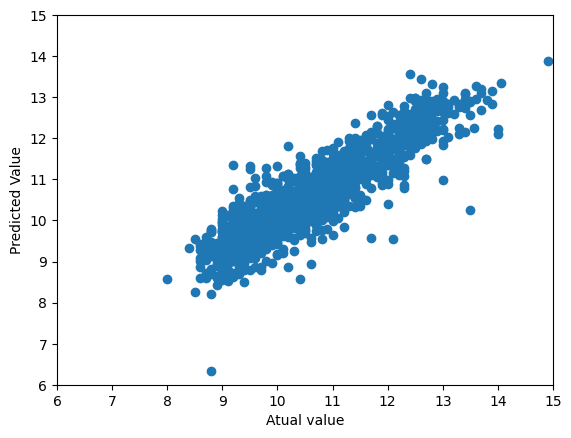

In [53]:
plt.scatter (y_test,y_hat) #create a plot with scatter points
plt.xlabel('Atual value') #x axis label
plt.ylabel('Predicted Value') #y axis label
plt.xlim(6,15) #range showne in plot for x axis
plt.ylim(6,15)#range showne in plot for x axis


#what conclusion can you draw from this?
#we've plotted the actual value against the predicted value. if we plotted it correctly, we would get a straight line (linear line y= mx+b). This is defintiely not a linear line, but its very close and the line of best fit would be linear with some outliers (but that is expected)
#this function is in 11D (11 dimensions)

In [54]:
#let's apply some data analytics
var_names =df.columns
print(var_names)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [55]:
coeffs = model.coef_
intercept = model.intercept_

In [56]:
print(f"The amount of {var_names[y_idx]} is modelled by: ")
x_var_names = df.columns.tolist()
x_var_names.remove(var_names[y_idx]) #get rid of all the x value names except the alcohol one

The amount of alcohol is modelled by: 


In [57]:
for i in range(len(x_var_names)):
  print(f"{coeffs[i]} times {x_var_names[i]}") #prints out the percentage of how much ingredient is in each wine (these are the slopes)
  #large numbers like density probably have a high impact on the wine while small values like free sulfur dioxide probbaly have little impact (can investigate these further to draw conclusions)

0.5363060324796161 times fixed acidity
1.4832657620099179 times volatile acidity
0.4472796960702049 times citric acid
0.19536070831151137 times residual sugar
0.07822054160681835 times chlorides
-0.00010447140375158259 times free sulfur dioxide
-0.004158195584262447 times total sulfur dioxide
-575.9649425396511 times density
2.8207207535370773 times pH
1.3328275267392187 times sulphates
0.14025508236211515 times quality
